# Captcha Recognition using Optical Character Recognition

This notebook shows my approach for recognition the captcha for computers to identify and block bots to prevent spam, DDOS, etc. It is solved regarding the CAPTCHA Images (Version 2 CAPTCHA Images) Challenge in Kaggle.

This notebook is separated into different sections, relating to the common workflow of machine learning. Hypothesis and Data collection these two things are already done. I tested different models but got various types of errors as I have not enough knowledge. I tried to find different approaches to creating models and ended up with the convolutional neural network. I am not sure about the best performance of the result. From the notebooks of Kaggle, there are many best results instead of mine. Hence I had problems with running the model and also in the use of test samples.


<ol>
 <li>Setup and Check Infrastructure </li>
 <li>Having a first look at the Data (EDA)</li>
 <li>Data Cleaning (Feature Engineering)</li>
 <li>Defining the architecture of our Model</li>
 <li>Data Augmentation</li>
 <li>Fitting data into the Model</li>
 <li>Analyzing losses</li>
 <li>Analyzing top six wrong identified characters</li>
 <li>Analysis of Captcha images</li>
 <li>Evaluation</li>
</ol>    

## Approach:

I started with this project by getting various libraries as I need the basic initial NumPy, pandas, seaborn, matplot to advanced ones like Keras, open cv for creating advanced models, plotting, and testing. From Kaggle, I can see different types of notebooks to get a feeling of what influences what and how does it generally works. After gaining some experience I combined several data cleaning approaches from different notebooks and general information from the internet. The most promising score yet was 0.9150743099787686. 



## Evaluation:

As will be mentioned in the last section, I try to compare use different models but can not find any good ones. So, here I submit the solution which I got. 

## Conclusion:

Overall it was an interesting project/competition which enabled me to learn new stuff and try out several tools. This is my first time I worked on image processing. It is interesting to see, that the same code giving different results when I used my pc and the pool pc of the university. I am not sure but maybe it happens because of the GPU and the Ram. I tried various preprocessing and it is quite interesting to me that the same model gives different types of accuracy. When I used test samples to find the accuracy of captcha I find difficulties and got low accuracy. I tried to solve my level best but as It was not improved so I used train samples to get my result. The convolutional neural network performed quite well in relation to the training runtime and resource consumption.

Another interesting aspect was to see the huge difference a properly cleaned dataset can make when using the same model.

## Outlook:

There are several ways how to improve these scores from my point of view. Some of them I have seen in other persons works in Kaggle notebooks already.
<ol>
<li>An adaptive learning rate could also help with optimizing the results.</li>
<li>Run the code on GPUs and high Ram.</li>
<li>Using the highest level of optimization in the model.</li>
<li>Better segmentation of the image into character could make a good result.</li> 
<li>Use larger grid searches to find better parameters for the given models.</li>
</ol>

## Limitations: 

<ol>
<li>It was not possible for me to get a good result with test sample.</li>
<li>It was quite slow to do some training on  this model.</li>
<li>Some of the points mentioned in Outlook were not possible since running code in browser.</li>
</ol>

## References:

Inspirations for implementation and design:

- https://www.kaggle.com/vykstorm/reading-captcha-dataset-part-1
- https://www.kaggle.com/vykstorm/extracting-words-from-images-with-opencv-part-2
- https://www.kaggle.com/vykstorm/char-classification-using-keras-part-3
- https://www.kaggle.com/varunagrawal123/captcha-final11
- https://www.kaggle.com/faressayah/ocr-model-for-reading-captchas
- https://www.kaggle.com/aakashnain/building-a-captcha-ocr-in-tf2-0
- https://www.kaggle.com/shawon10/captcha-recognition
- https://www.kaggle.com/bharatbansal/ocr-with-opencv-92-9-accuracy-on-captcha-codes
- https://www.kaggle.com/fournierp/opencv-word-segmenting-on-captcha-images



Thanks to everyone whos code I have used!

## 1. Setup and Check Infrastructure
The first step is to get the infrastructure up and running. Important to mention here is that I need to use Keras libraries for the various purpose which are done below.

If you find yourself running these notebooks, you might find this placeholder thing helpful. The only thing to touch is the environment you are running on.

### Installing all necessary librarys and tools
Setting up the environment path accordingly to your choice of environment.


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np 
import pandas as pd
import os

import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

## 2. First look at the Data (EDA)
The initial step to getting used to the data is having a look at it and loading it in a useable structure. Before we can train something which predicts the single character of the captcha we first have to take a look at what data we have available. 



Input data files are available in the read-only "r'C:\Users\User\Desktop\Lab\DataMining2020\Project\train'" directory. Like running this will list all files under the train directory.

In [2]:
i=0;
for dirname, _, filenames in os.walk(r'C:\Users\User\Desktop\Lab\DataMining2020\Project\train'):
    for filename in filenames:
        i+=1
        print(os.path.join(dirname, filename))


C:\Users\User\Desktop\Lab\DataMining2020\Project\train\226md.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\22d5n.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\2356g.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\23mdg.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\23n88.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\243mm.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\244e2.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\245y5.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\24f6w.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\24pew.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\25257.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\253dc.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\25egp.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\25m6p.png
C:\Users\User\Desktop\Lab\DataMining2020\Project\train\25p2m.png
C:\Users\User\Desktop\Lab

**Loading Images**

In [3]:
data_dir = Path(r'C:\Users\User\Desktop\Lab\DataMining2020\Project\train')
images = list(data_dir.glob("*.png"))

## 3. Data Cleaning (Feature Engineering)

### Creating labelled data
As we know that each of our images contains a line that cuts several characters. So we are going to remove that line by morphological operations on our image. 
<ol>
<li> We will threshold our image then we will dilate to remove that line. </li>
<li>It states in the description that each image contains five characters and the positions of all five characters are always the same. So we will hardcode the character's position and from each image, we will extract five characters with their corresponding label, and hence will get a labeled data. </li>
<li> We will pad each character image to change it in the required dimension.</li>
<ol>

**Defining function for padding**

In [4]:
kernel =np.ones((3,1),np.uint8)
borderType = cv2.BORDER_CONSTANT
def pad(src): 
    top = int(0.05 * src.shape[0])  # shape[0] = rows
    bottom = top
    left = int(0.15 * src.shape[1])  # shape[1] = cols
    right = left
    des=cv2.copyMakeBorder(src, top, bottom, left+1, right, borderType, None,255)
    return cv2.bitwise_not(des)

**Creating Labelled Data**

In [5]:
x=[]
y=[]
for image in images:
    im=cv2.imread(str(image),0)
    threshold=cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
    erosion =cv2.dilate(threshold,kernel,iterations=2)
    s=str(image)
    for i in range(5):
        x.append(pad(erosion[:,(30+23*i):(30+23*(i+1))]))
        y.append(s[-9+i])

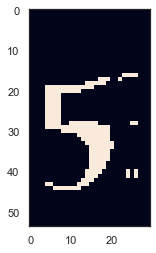

In [6]:
plt.imshow(x[56])

In [7]:
y[56]

'5'

In [8]:
x=np.array(x)
y=np.array(y)

Here we can see the present characters and their frequencies which is ensure that our data is not biased.

In [9]:
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['2' '241']
 ['3' '237']
 ['4' '259']
 ['5' '263']
 ['6' '241']
 ['7' '232']
 ['8' '246']
 ['b' '212']
 ['c' '238']
 ['d' '234']
 ['e' '209']
 ['f' '242']
 ['g' '236']
 ['m' '240']
 ['n' '482']
 ['p' '229']
 ['w' '211']
 ['x' '246']
 ['y' '212']]


In [10]:
data=np.reshape(x,(-1,54,30,1))

**Converting labels in one-hot encoder form**

In [11]:
train = []
l=['2','3','4','5','6','7','8','b','c','d','e','f','g','m','n','p','w','x','y']
for j in y:
    i=l.index(j)
    a=[]
    for r in range(19):
        if(r==i):
            a.append(1)
        else:
            a.append(0)
    a=np.array(a)
    train.append(a)
train=np.array(train) 

## 4. Defining the architecture of our Model

In [12]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (50,30,1)))
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(19, activation = "softmax"))

**Optimizer Functions**

In [13]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [14]:
epochs = 30 
batch_size = 86

**Splitting Data**

Here at first, I tried to implement the data of test samples after the pre-processing but got a lot of errors for various reasons. As I am not a good problem solver, so I worked with the train data set.

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(data, train, test_size = 0.1, random_state= 2)
X_train=X_train/255.0
X_val=X_val/255.0

## 5. Data Augmentation

Here we try to increase the amount of data by adding slightly modified copies of existing data. It acts as a regularizer and helps reduce the overfitting of the learning model.


In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = False, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

## 6. Fitting data into the Model

In [17]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs =  30, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
49/49 [==============================] - 14s 289ms/step - loss: 2.7382 - accuracy: 0.1531 - val_loss: 2.0652 - val_accuracy: 0.3524
Epoch 2/30
49/49 [==============================] - 14s 281ms/step - loss: 2.0399 - accuracy: 0.3773 - val_loss: 0.9596 - val_accuracy: 0.7155
Epoch 3/30
49/49 [==============================] - 14s 287ms/step - loss: 1.4520 - accuracy: 0.5596 - val_loss: 0.7082 - val_accuracy: 0.8089
Epoch 4/30
49/49 [==============================] - 14s 280ms/step - loss: 1.0801 - accuracy: 0.6790 - val_loss: 0.4825 - val_accuracy: 0.8493
Epoch 5/30
49/49 [==============================] - 14s 294ms/step - loss: 0.8430 - accuracy: 0.7421 - val_loss: 0.4073 - val_accuracy: 0.8705
Epoch 6/30
49/49 [==============================] - 14s 278ms/step - loss: 0.6769 - accuracy: 0.7871 - val_loss: 0.3333 - val_accuracy: 0.8896
Epoch 7/30
49/49 [==============================] - 14s 288ms/step

## 7. Analyzing losses 

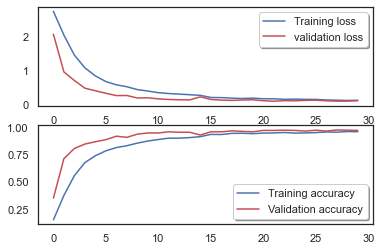

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 8. Analyzing top six  wrong identified characters

In [19]:
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((54,30)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            print("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

Predicted label :14
True label :10
Predicted label :5
True label :14
Predicted label :14
True label :13
Predicted label :13
True label :14
Predicted label :4
True label :7
Predicted label :10
True label :8


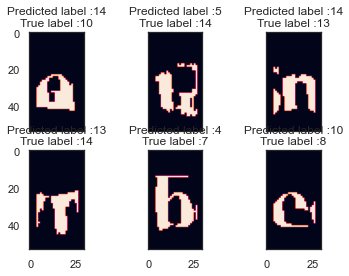

In [20]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 9. Analysis of Captcha images

Until now we have evaluated and trained our model on the character dataset. Now we are going to test the accuracy of our model on captcha images. A captcha image is said to be correctly predicted if all the characters in that image are correctly identified.

In [21]:
def captcha(img,p):
    im=cv2.imread(str(img),0)
    threshold=cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
    erosion =cv2.dilate(threshold,kernel,iterations=2)
    images=[]
    for i in range(5):
        images.append(pad(erosion[:,(30+23*i):(30+23*(i+1))]))
    images=np.reshape(images,(-1,54,30,1))
    pred=model.predict(images)
    pred=np.argmax(pred,axis = 1)
    predicted=str(l[pred[0]]+l[pred[1]]+l[pred[2]]+l[pred[3]]+l[pred[4]])
    if(p):
        print(predicted)
    if(predicted==img[-9:-4]):
        return 1
    return 0

In [22]:
images = list(data_dir.glob("*.png"))
t=0
for i in images:
    t+=captcha(str(i),False)

## 10. Evaluation

In [23]:
print("total images",len(images),"correctly identified",t)
print("Accuracy is",t/len(images))

total images 942 correctly identified 862
Accuracy is 0.9150743099787686
